# Shark Tank

_Shark Tank_ is a reality TV show. Contestants present their idea for a company to a panel of investors (a.k.a. "sharks"), who then decide whether or not to invest in that company.  The investors give a certain amount of money in exchange for a percentage stake in the company ("equity"). If you are not familiar with the show, you may want to watch part of an episode [here](https://www.youtube.com/watch?v=3VBmLGUDxWA) to get a sense of how it works.  You can also search for a clip on YouTube. 

The data that you will examine in this lab contains data about all contestants from the first 6 seasons of the show, including:
- the name and industry of the proposed company
- whether or not it was funded (i.e., the "Deal" column)
- which sharks chose to invest in the venture (N.B. There are 7 regular sharks, not including "Guest". Each shark has a column in the data set, labeled by their last name.)
- if funded, the amount of money the sharks put in and the percentage equity they got in return

To earn full credit on this lab, you should:
- use built-in `pandas` methods (like `.sum()` and `.max()`) instead of writing a for loop over a `DataFrame` or `Series`
- use the split-apply-combine pattern wherever possible

Of course, if you can't think of a vectorized solution, a `for` loop is still better than no solution at all!

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from IPython.display import display

import math

## Question 0. Getting and Cleaning the Data

The data is stored in the CSV file `sharktank.csv`. Read in the data into a Pandas `DataFrame`.

In [2]:
# YOUR CODE HERE
df_stank = pd.read_csv("sharktank.csv")
df_stank.head()

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2,1.0,1.0,Wispots,No,Business Services,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is one column for each of the sharks. A 1 indicates that they chose to invest in that company, while a missing value indicates that they did not choose to invest in that company. Notice that these missing values show up as NaNs when we read in the data. Fill in these missing values with zeros. Other columns may also contain NaNs; be careful not to fill those columns with zeros, or you may end up with strange results down the line.

In [3]:
# YOUR CODE HERE
df_stank.fillna(value=0, inplace=True)
df_stank.head()

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,"$50,000",55%,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,"$460,000",50%,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,1.0,1.0,Wispots,No,Business Services,Male,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Notice that Amount and Equity are currently being treated as categorical variables (`dtype: object`). Can you figure out why this is? Clean up these columns and cast them to numeric types (i.e., a `dtype` of `int` or `float`) because we'll need to perform mathematical operations on these columns.

In [4]:
# YOUR CODE HERE
def clean(x):
    '''Removes the $ symbol from the Amount column'''
    return x.replace("$", "").replace(",", "").replace("%", "")

# can use str.replace here
df_stank["Amount"] = df_stank["Amount"].astype(str).apply(clean).astype(int)
df_stank["Equity"] = df_stank["Equity"].astype(str).apply(clean).astype(float)
df_stank.head()

,Season,No. in series,Company,Deal,Industry,Entrepreneur Gender,Amount,Equity,Corcoran,Cuban,Greiner,Herjavec,John,O'Leary,Harrington,Guest,Details / Notes
0,1.0,1.0,Ava the Elephant,Yes,Healthcare,Female,50000,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,1.0,Mr. Tod's Pie Factory,Yes,Food and Beverage,Male,460000,50.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0
2,1.0,1.0,Wispots,No,Business Services,Male,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,1.0,College Foxes Packing Boxes,No,Lifestyle / Home,Male,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.0,1.0,Ionic Ear,No,Uncertain / Other,Male,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


## Question 1. Which Company was Worth the Most?

The valuation of a company is how much it is worth. If someone invests \\$10,000 for a 40\% equity stake in the company, then this means the company must be valued at \$25,000, since 40% of \\$25,000 is \\$10,000.

Calculate the valuation of each company that was funded. Which company was most valuable? Is it the same as the company that received the largest total investment from the sharks?

In [5]:
# YOUR CODE HERE
# can also drop rows with 0 equity
def compute_worth(x):
    if (x["Equity"]/100 < 0.01):
        return 0.0
    return round(x["Amount"] / (x["Equity"] / 100))

df_stank["Worth"] = 0.0
df_stank["Worth"] = df_stank[["Amount", "Equity"]].apply(compute_worth, axis=1)

# df_stank[columnname].idxmax <-- look up later
df_max_worth = df_stank.loc[ df_stank["Worth"] == df_stank["Worth"].max() ]
df_max_inv = df_stank.loc[ df_stank["Amount"] == df_stank["Amount"].max() ]

print(f"Name: \"{df_max_worth['Company'].iloc[0].strip()}\" (largest company worth)")
print(f" - Amount: ${df_max_worth['Amount'].iloc[0]}")
print(f" - Equity: {df_max_worth['Equity'].iloc[0]}%")
print(f" - Worth: ${df_max_worth['Worth'].iloc[0]}")

print(f"\nName: \"{df_max_inv['Company'].iloc[0].strip()}\" (largest amount invested)")
print(f" - Amount: ${df_max_inv['Amount'].iloc[0]}")
print(f" - Equity: {df_max_inv['Equity'].iloc[0]}%")
print(f" - Worth: ${df_max_inv['Worth'].iloc[0]}")

Name: "Zipz" (largest company worth)
 - Amount: $2500000
 - Equity: 10.0%
 - Worth: $25000000.0

Name: "AirCar" (largest amount invested)
 - Amount: $5000000
 - Equity: 50.0%
 - Worth: $10000000.0


**YOUR EXPLANATION HERE**

The company that is worth the most is named Zipz. It is worth $25,000,000. It is not the same company that received the largest total investment from the sharks. The company which received the largest investment total investment from the sharks is called AirCar, and it received a total amount of $10,000,000.

## Question 2. Which Shark Invested the Most?

Calculate the total amount of money that each shark invested over the 6 seasons. Which shark invested the most total money over the 6 seasons?

_Hint:_ If $n$ sharks funded a given venture, then the amount that each shark invested is the total amount divided by $n$.

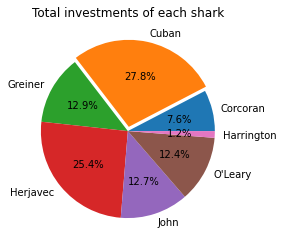

<AxesSubplot:>

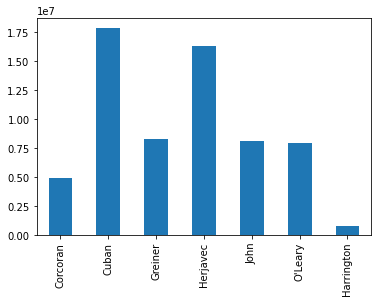

In [9]:
# ENTER CODE HERE.

df_stank["num_inv"] = df_stank["Corcoran"] + df_stank["Cuban"] + df_stank["Greiner"] + df_stank["Herjavec"] + df_stank["John"] + df_stank["O'Leary"] + df_stank["Harrington"]

# corcoran_inv = 0

def calcul_amnt(x):
    if (x[2] > 0 and x[0] > 0):
        return x[0] / x[1]
    return 0.0

df_stank["CO_I"] = df_stank[["Amount", "num_inv", "Corcoran"]].apply(calcul_amnt, axis=1)
df_stank["CU_I"] = df_stank[["Amount", "num_inv", "Cuban"]].apply(calcul_amnt, axis=1) 
df_stank["GR_I"] = df_stank[["Amount", "num_inv", "Greiner"]].apply(calcul_amnt, axis=1) 
df_stank["HE_I"] = df_stank[["Amount", "num_inv", "Herjavec"]].apply(calcul_amnt, axis=1) 
df_stank["JO_I"] = df_stank[["Amount", "num_inv", "John"]].apply(calcul_amnt, axis=1) 
df_stank["OL_I"] = df_stank[["Amount", "num_inv", "O'Leary"]].apply(calcul_amnt, axis=1) 
df_stank["HA_I"] = df_stank[["Amount", "num_inv", "Harrington"]].apply(calcul_amnt, axis=1) 

investments = pd.DataFrame(
        data=[ df_stank["CO_I"].sum(), df_stank["CU_I"].sum(), df_stank["GR_I"].sum(), df_stank["HE_I"].sum(), df_stank["JO_I"].sum(), df_stank["OL_I"].sum(), df_stank["HA_I"].sum() ],
        columns=["investment"],
        index=["Corcoran", "Cuban", "Greiner", "Herjavec", "John", "O'Leary", "Harrington"]
)

investments["investment"].plot(kind="pie", rot=1, title="Total investments of each shark", label="", autopct='%1.1f%%', explode=(0, 0.05, 0, 0, 0, 0, 0))
plt.show()
investments["investment"].plot(kind="bar")
# can multiply every investor by amount / num_inv having dropped rows with amount = 0


**YOUR EXPLANATION HERE**

As we can see from the pie chart, the shark that invested the most is Mark Cuban, having a total of 27.8% of investments among all the sharks.

## Question 3. Do the Sharks Prefer Certain Industries?

Calculate the funding rate (the proportion of companies that were funded) for each industry. Make a visualization showing this information.

<AxesSubplot:title={'center':'Total investments of each shark'}>

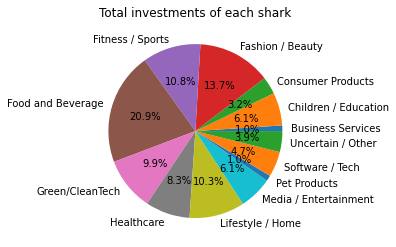

In [7]:
# ENTER CODE HERE.

df_stank.groupby("Industry")["Amount"].sum().plot(kind="pie", rot=1, title="Total investments of each shark", label="", autopct='%1.1f%%')

## add bar plot later

**YOUR EXPLANATION HERE**

Yes, the sharks do prefer certain industries. For example, "Food and Beverage" industry gathered the most investments from all of the involved sharks. Closely following are the "Fitness / Sports" and "Gree/CleanTech" industries, though they are beyond 8% less relevant to the sharks than "Food and Beverage."

## Submission Instructions

Once you are finished, follow these steps:

1. Restart the kernel and re-run this notebook from beginning to end by going to `Kernel > Restart Kernel and Run All Cells`.

2. If this process stops halfway through, that means there was an error. Correct the error and repeat Step 1 until the notebook runs from beginning to end.

3. Double check that there is a number next to each code cell and that these numbers are in order.

Then, submit your lab as follows:

1. Go to `File > Export Notebook As > PDF`.

2. Double check that the entire notebook, from beginning to end, is in this PDF file. (If the notebook is cut off, try first exporting the notebook to HTML and printing to PDF.)

3. Upload the PDF to Gradescope and Notebook (ipynb) to canvas (one submission per group).

4. Demo your lab if you want to know your score right away.